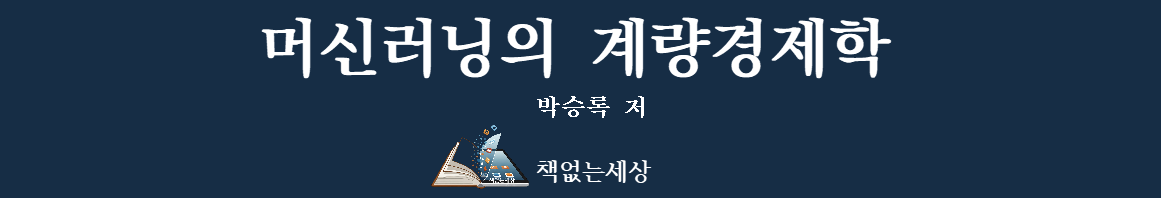

# Part 7: 시계열 분석법

## Chapter 4: 공적분과 오차수정 모형

In [1]:
# 작업공간(working directory)지정  
import os  
os.chdir("X:/Econometrics_with_ML")
os.getcwd()

'X:\\Econometrics_with_ML'

In [2]:
exec(open('X:/Econometrics_with_ML/Functions/Traditional_Econometrics_Lib.py').read())

In [3]:
# 한국의 거시경제 통계자료 불러오기
data = pd.read_csv('Data/Korea_GDP.csv',index_col='Time', parse_dates=True)
new_index = pd.date_range(start='1961-03-31', periods=len(data), freq='Q')
data.index = pd.to_datetime(new_index)
data.index

DatetimeIndex(['1961-03-31', '1961-06-30', '1961-09-30', '1961-12-31',
               '1962-03-31', '1962-06-30', '1962-09-30', '1962-12-31',
               '1963-03-31', '1963-06-30',
               ...
               '2021-09-30', '2021-12-31', '2022-03-31', '2022-06-30',
               '2022-09-30', '2022-12-31', '2023-03-31', '2023-06-30',
               '2023-09-30', '2023-12-31'],
              dtype='datetime64[ns]', length=252, freq='QE-DEC')

In [4]:
df = data[[ 'gdp', 'inv', 'con']]
df

,gdp,inv,con
1961-03-31,7000.7,-659.9,8957.5
1961-06-30,8141.3,1736.8,6593.8
1961-09-30,6970.2,833.2,6308.6
1961-12-31,8974.2,950.7,8740.5
1962-03-31,7444.8,-727.9,9670.8
...,...,...,...
2022-12-31,513770.2,159480.4,235677.7
2023-03-31,472155.5,132942.8,233780.3
2023-06-30,497345.6,146189.8,229263.8
2023-09-30,500997.0,148498.3,233387.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 1961-03-31 to 2023-12-31
Freq: QE-DEC
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gdp     252 non-null    float64
 1   inv     252 non-null    float64
 2   con     252 non-null    float64
dtypes: float64(3)
memory usage: 7.9 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gdp,252.0,183631.820238,162464.624385,6970.2,33540.825,133900.05,323997.500,525122.8
inv,252.0,57364.224603,50309.687014,-727.9,8011.575,50758.45,100932.575,159480.4
con,252.0,98084.290476,76178.926904,6308.6,24497.325,81404.05,170912.725,237874.7


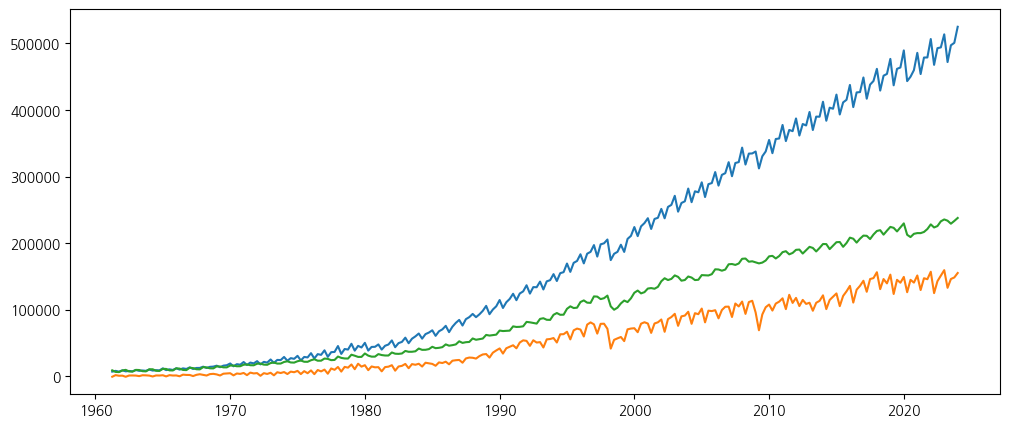

In [7]:
# Graphics size
sns.mpl.rc('figure', figsize=(12, 5))
plt.plot(df)

## 2. 공적분과 오차수정 메커니즘

In [8]:
# 가성회귀(Spurious regression)
res = smf.ols('con ~ gdp', data=data).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    con   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.074e+04
Date:                Tue, 19 Aug 2025   Prob (F-statistic):          1.60e-242
Time:                        15:31:14   Log-Likelihood:                -2631.6
No. Observations:                 252   AIC:                             5267.
Df Residuals:                     250   BIC:                             5274.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.249e+04    792.895     15.758      0.0

<Axes: >

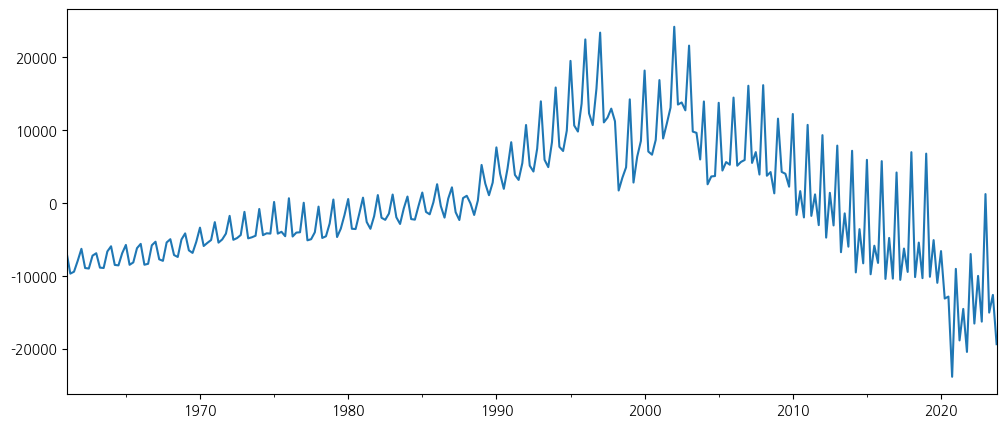

In [9]:
# 가성회귀 잔차의 그래프
res.resid.plot()

## 3. 공적분의 검정
### 가. 단일방정식에서 공적분 검정: Engle-Granger 접근법

In [10]:
# Augmented Dickey-Fuller Test: GDP
for i in ['n','c','ct', 'ctt']:    
    adf_tt = ADF(df['gdp'], trend=i, lags=4)  
    print(adf_tt.summary().as_text()) 

   Augmented Dickey-Fuller Results   
Test Statistic                  3.644
P-value                         1.000
Lags                                4
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                  2.413
P-value                         0.999
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.140
P-value                         0.524
Lags                                4
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.00 (1%), -3.4

In [11]:
# Augmented Dickey-Fuller Test: 소비
for i in ['n','c','ct', 'ctt']:    
    adf_tt = ADF(df['con'], trend=i, lags=4)  
    print(adf_tt.summary().as_text()) 

   Augmented Dickey-Fuller Results   
Test Statistic                  2.926
P-value                         1.000
Lags                                4
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                  0.910
P-value                         0.993
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.548
P-value                         0.304
Lags                                4
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.00 (1%), -3.4

In [12]:
# Augmented Dickey-Fuller Test: 투자
for i in ['n','c','ct', 'ctt']:    
    adf_tt = ADF(df['inv'], trend=i, lags=4)  
    print(adf_tt.summary().as_text()) 

   Augmented Dickey-Fuller Results   
Test Statistic                  1.819
P-value                         0.984
Lags                                4
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                  0.157
P-value                         0.970
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -3.088
P-value                         0.109
Lags                                4
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.00 (1%), -3.4

#### Engle-Granger test 

In [16]:
y = df[['con']]
X = df[['gdp']]

eg_test = engle_granger(y, X, trend="n")
print(eg_test)

Engle-Granger Cointegration Test
Statistic: 0.323360563371085
P-value: 0.9662658681848143
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 7
Trend: c
Estimated Root ρ (γ+1): 1.003638837413762
Distribution Order: 1


#### 4) 오차수정 모형의 추정

In [17]:
# 공적분된 2변수의 VECM추정
y = np.log(data['con'])
X = np.log(data['gdp'])
endog = pd.concat([y, X], axis=1)

model = VECM(endog=endog, exog=None, exog_coint=None, k_ar_diff=2, coint_rank=1, deterministic='ct')
vecm_res = model.fit()

print(vecm_res.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation con
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.con        -0.2983      0.038     -7.838      0.000      -0.373      -0.224
L1.gdp         0.1721      0.044      3.942      0.000       0.087       0.258
L2.con        -0.8666      0.034    -25.640      0.000      -0.933      -0.800
L2.gdp         0.3811      0.039      9.660      0.000       0.304       0.458
Det. terms outside the coint. relation & lagged endog. parameters for equation gdp
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.con        -0.4980      0.056     -8.962      0.000      -0.607      -0.389
L1.gdp        -0.6326      0.064     -9.925      0.000      -0.758      -0.508
L2.con        -0.4829      0.049     -9.784 

### 나. 복수의 방정식에서 공적분 검정: Johansen 접근법

In [18]:
rank_test = select_coint_rank(endog=endog, det_order=-1, k_ar_diff=2, method="maxeig", signif=0.05)  
print('Rank of Pi matrix: ', rank_test.rank)  

# Johansen test result  
print(rank_test.summary()) 

Rank of Pi matrix:  1
Johansen cointegration test using maximum eigenvalue test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          103.3          11.22
  1   2         0.4545          4.130
-------------------------------------


## 4. 벡터오차수정(VEC) 모형과 분석 절차

In [19]:
# 적정 시차의 선택
lag_order = select_order(data=endog, maxlags=10, deterministic='co', seasons=0)  
print(lag_order.summary()) 

# Lags selected by indicator  
print('Akaike Information Criterion :',lag_order.aic)  
print('Schwarz Information Criterion :',lag_order.bic)  
print('Final Prediction Error :',lag_order.fpe)  
print('Hannan-Quinn Criterion :',lag_order.hqic) 

 VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -10.44      -10.32   2.936e-05      -10.39
1       -11.69      -11.52   8.388e-06      -11.62
2       -12.65      -12.42   3.216e-06      -12.55
3       -14.36      -14.07   5.811e-07      -14.24
4       -15.15      -14.81   2.620e-07      -15.02
5       -15.22      -14.82   2.443e-07      -15.06
6       -15.28     -14.82*   2.305e-07     -15.10*
7       -15.26      -14.74   2.354e-07      -15.05
8      -15.31*      -14.73  2.240e-07*      -15.08
9       -15.29      -14.65   2.293e-07      -15.03
10      -15.27      -14.57   2.341e-07      -14.99
--------------------------------------------------
Akaike Information Criterion : 8
Schwarz Information Criterion : 6
Final Prediction Error : 8
Hannan-Quinn Criterion : 6


In [20]:
# VECM model의 추정  
model = VECM(endog=endog, exog=None, exog_coint=None, k_ar_diff=lag_order.aic, coint_rank=rank_test.rank, deterministic='co')  
vecm_res = model.fit()  

print(vecm_res.summary()) 

Det. terms outside the coint. relation & lagged endog. parameters for equation con
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0834      0.027      3.080      0.002       0.030       0.136
L1.con        -0.1523      0.067     -2.269      0.023      -0.284      -0.021
L1.gdp         0.1788      0.064      2.787      0.005       0.053       0.304
L2.con        -0.2030      0.074     -2.749      0.006      -0.348      -0.058
L2.gdp         0.1273      0.074      1.720      0.085      -0.018       0.272
L3.con        -0.1945      0.075     -2.600      0.009      -0.341      -0.048
L3.gdp         0.0970      0.075      1.300      0.194      -0.049       0.243
L4.con         0.4183      0.080      5.197      0.000       0.261       0.576
L4.gdp         0.0587      0.082      0.717      0.473      -0.102       0.219
L5.con        -0.1419      0.075     -1.882     

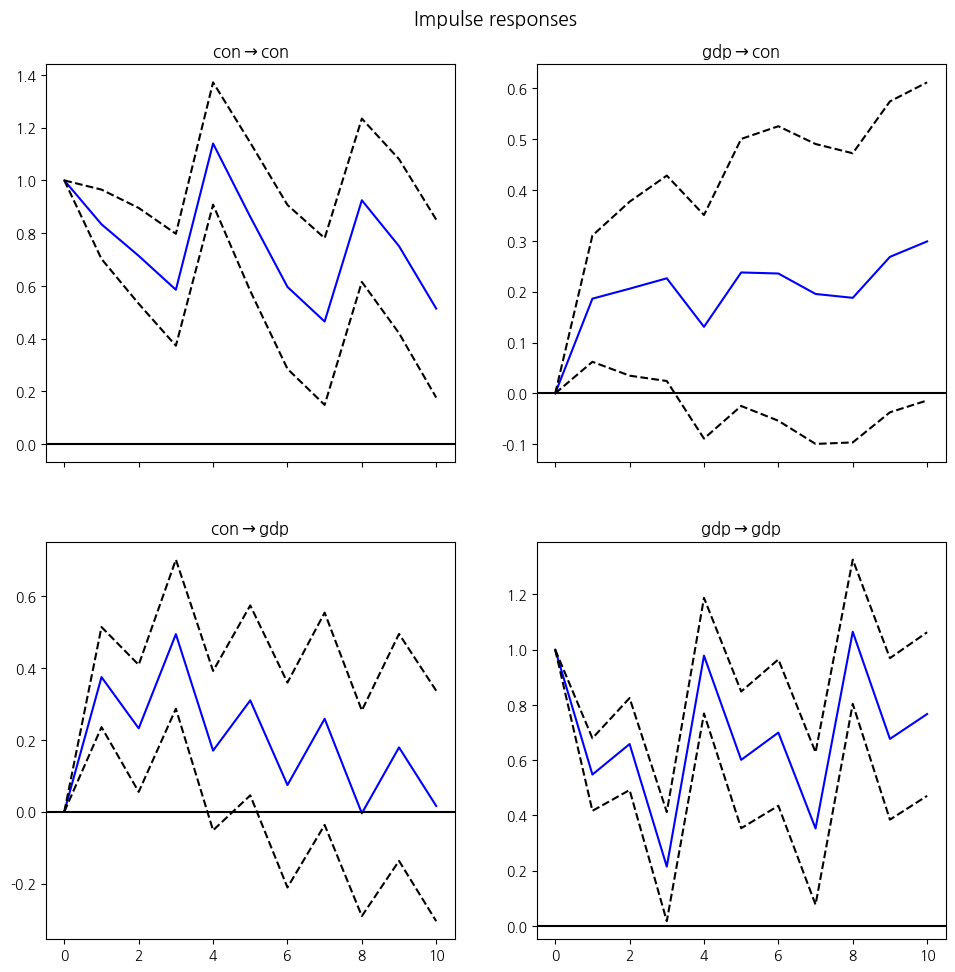

In [21]:
# 충격반응함수(Impulse Response Functions)
fig = vecm_res.irf(10).plot() 

,con,gdp
0,12.370240,13.093014
1,12.362702,13.143727
2,12.381646,13.150189
3,12.405441,13.198500
4,12.396113,13.127760
5,12.390918,13.179931
6,12.407443,13.183678
7,12.432476,13.231230
8,12.421561,13.162539
9,12.417451,13.213529


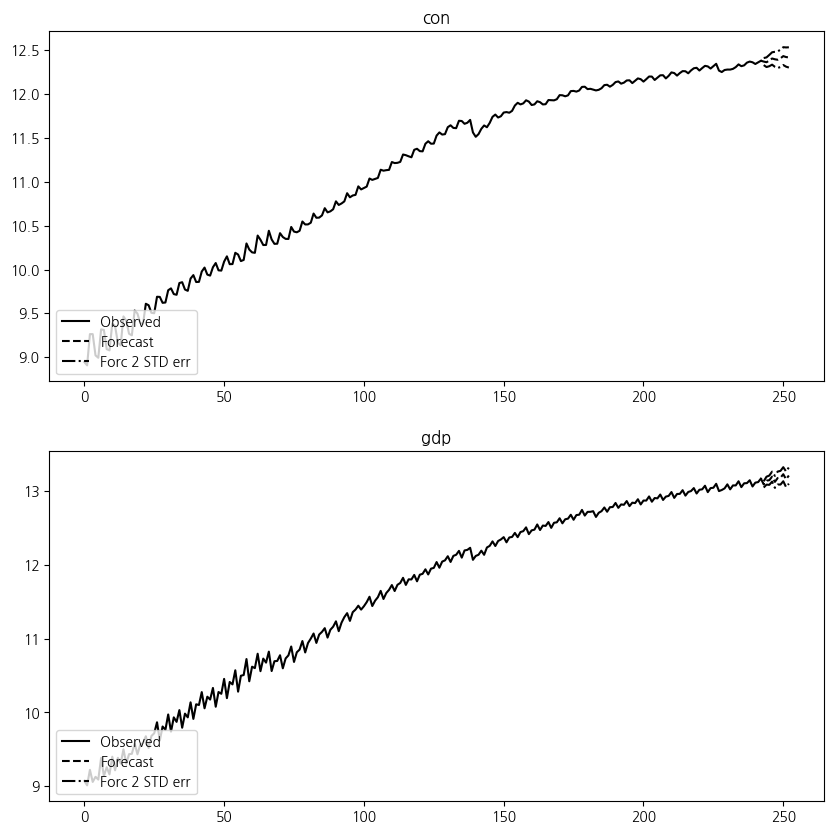

In [22]:
# 예측
forecast = vecm_res.predict(10)  
forecast = pd.DataFrame(forecast, columns=endog.columns)  
display(forecast) 

# Graphing the forecast of the variables  
vecm_res.plot_forecast(10) 
